Load Dataset

In [1]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("adult.data")

Check DF dimensions

In [2]:
dataframe.shape

(32560, 15)

In [3]:
dataframe.head(20)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
dataframe.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [5]:
colnames = [
    "Age",
    "Workclass",
    "Fnlwgt",
    "Education",
    "Education Num",
    "Marital Status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Capital Gain",
    "Capital Loss",
    "Hours Per Week",
    "Native Country",
    "Income"
]

dataframe.columns = colnames

In [6]:
#check for null values
dataframe.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours Per Week    0
Native Country    0
Income            0
dtype: int64

In [7]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
Fnlwgt            32560 non-null int64
Education         32560 non-null object
Education Num     32560 non-null int64
Marital Status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital Gain      32560 non-null int64
Capital Loss      32560 non-null int64
Hours Per Week    32560 non-null int64
Native Country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df = dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
catdf = df.select_dtypes(exclude=numerics)
numdf = df.select_dtypes(include=numerics)

In [9]:
#obtain categorical and numerical columns
catcols = catdf.columns
numcols = numdf.columns

In [10]:
df.duplicated().value_counts()

False    32536
True        24
dtype: int64

In [11]:
#number of duplicates
len_dfDup = len(df[df.duplicated()])
dfDup = df[df.duplicated()]
print(len_dfDup)
dfDup

#number of duplicated rows including original
# dpDup2 = df[df.duplicated(keep = False)]
# len(dpDup2)

df = df.drop_duplicates()
df

24


,Age,Workclass,Fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
#percentage of people who are below 50k
df['Income'].value_counts()
LT50K = df['Income'].value_counts()[0]
GT50K = df['Income'].value_counts()[1]
Perc_LT50K = LT50K/df.shape[0]
Perc_GT50K = GT50K/df.shape[0]
print('Percentage of people less than or equal 50k salary', Perc_LT50K)
print('Percentage of people greater than 50k salary', Perc_GT50K)


Percentage of people less than or equal 50k salary 0.7590668797639538
Percentage of people greater than 50k salary 0.24093312023604624


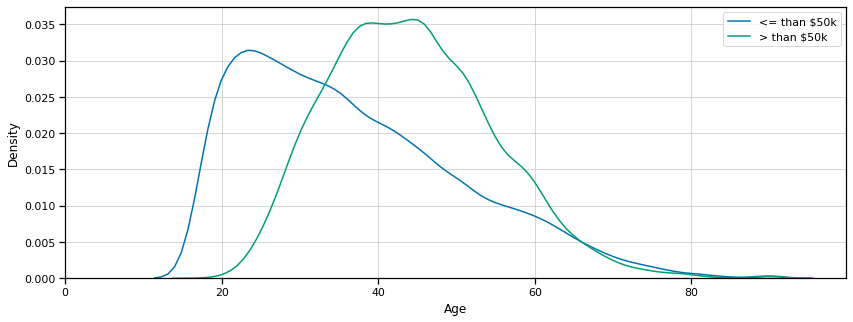

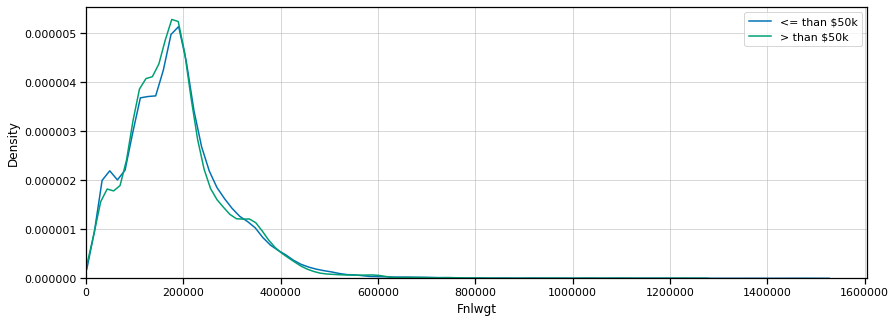

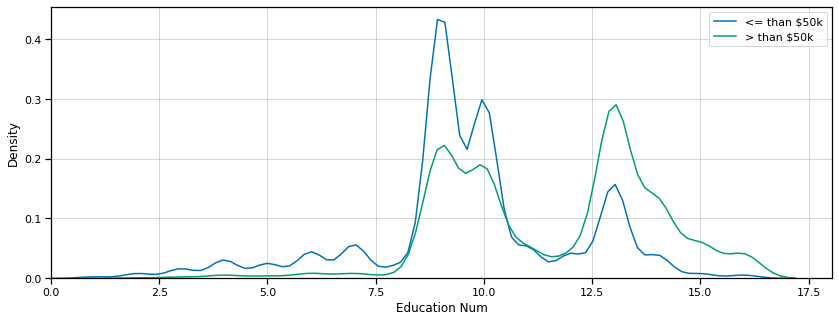

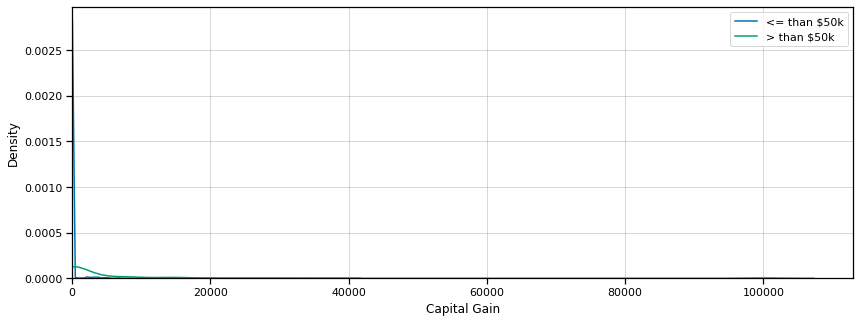

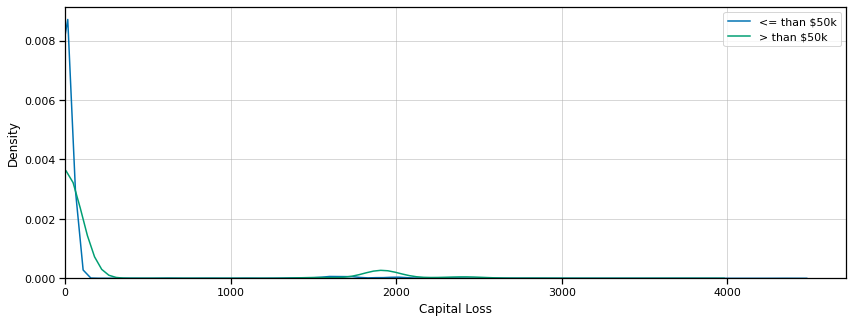

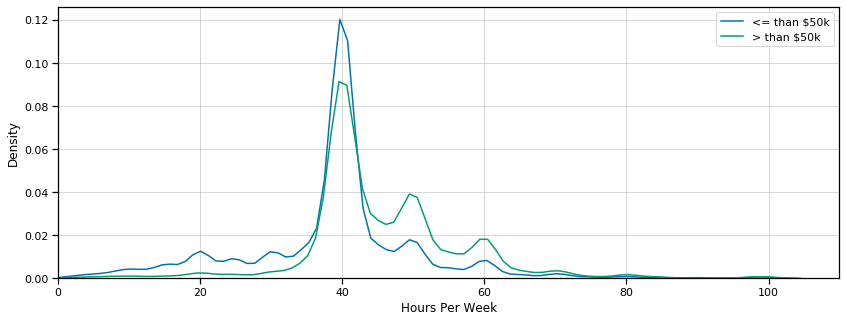

In [13]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
for col in numcols:
    plt.figure(figsize=(14,5))
    plt.style.use('seaborn-colorblind')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
    sns.kdeplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k')
    sns.kdeplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k')
    plt.xlabel(col)
    plt.xlim(left=0)
    plt.ylabel('Density')
    plt.legend()
    plt.show()
#     plt.title(col, ' by Income Status');

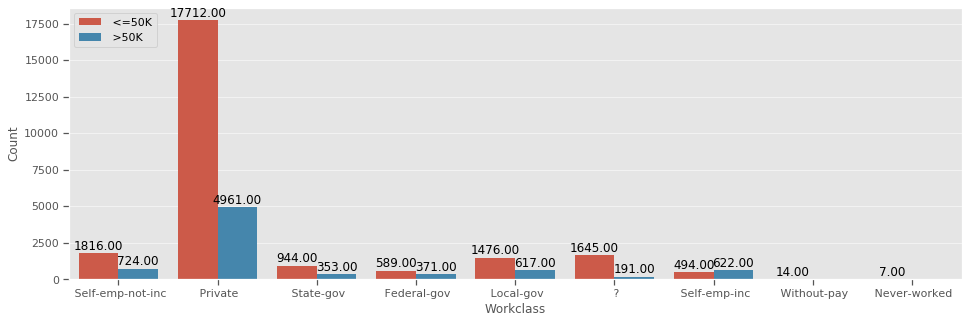

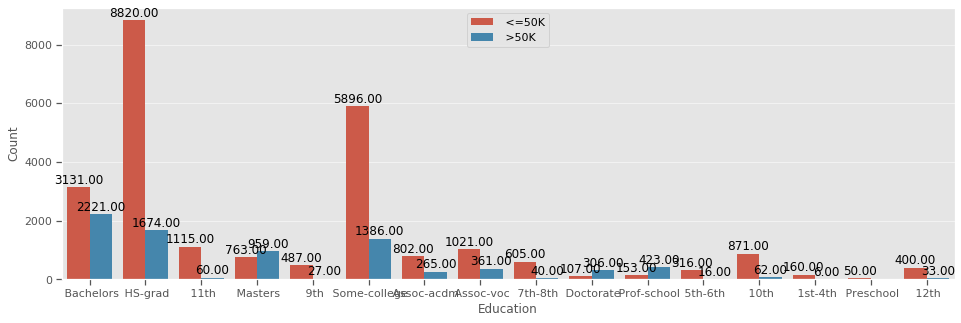

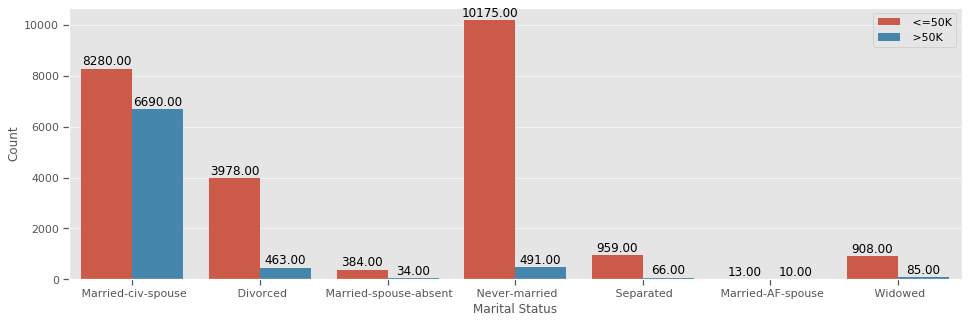

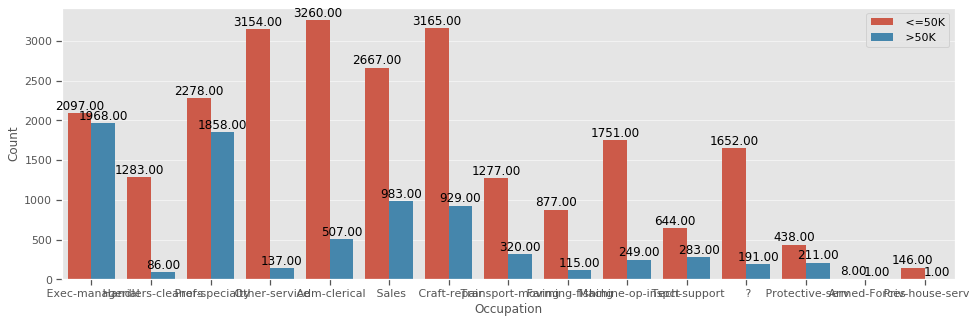

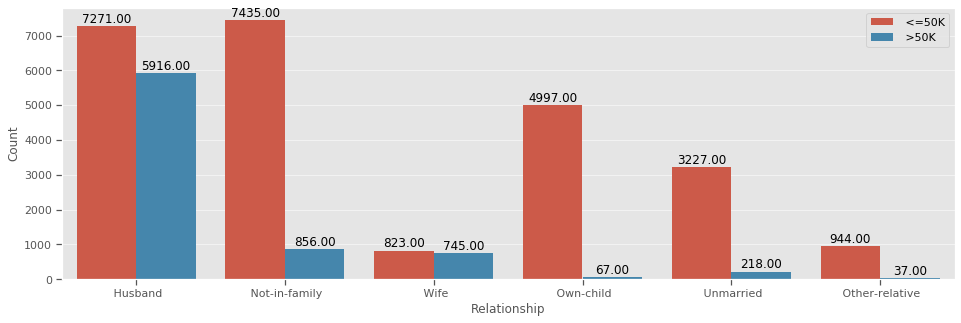

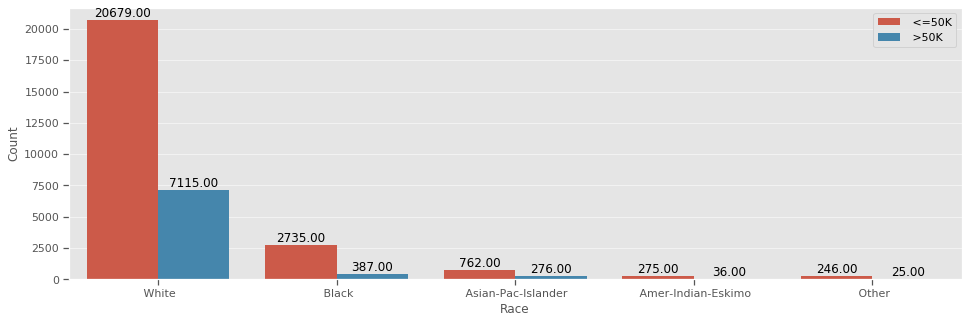

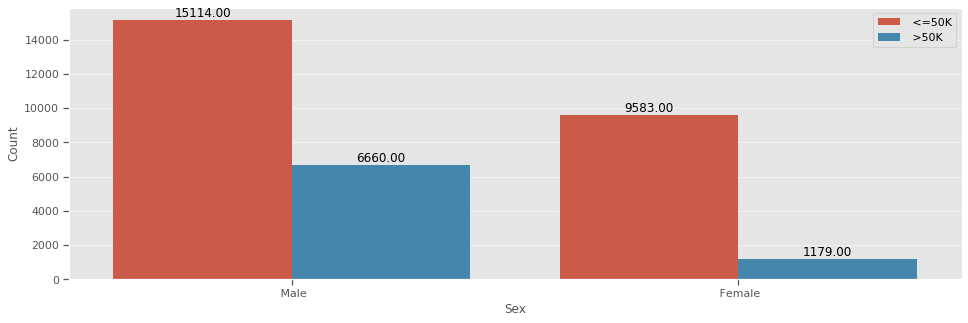

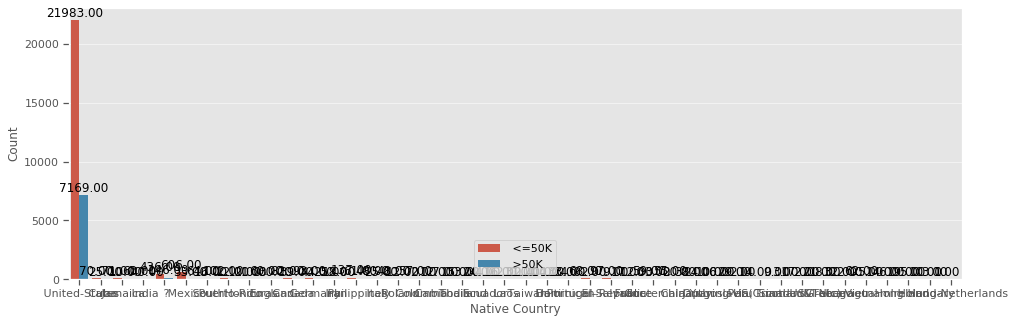

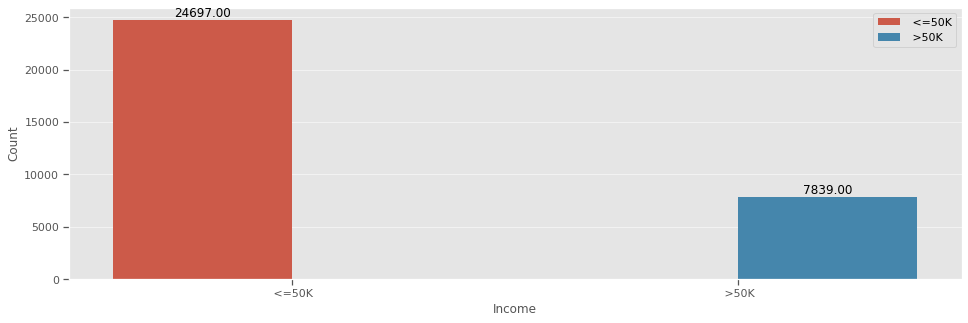

In [14]:
for col in catcols:
    plt.figure(figsize=(16,5))
#     plt.style.use('seaborn-colorblind')
    plt.style.use('ggplot')
    sns.set_context("notebook")
    plt.grid(True, alpha=0.5)
    splot = sns.countplot(x = col, hue = 'Income', data = df)
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')
#     sns.countplot(df.loc[df['Income'] == ' <=50K', col], label = '<= than $50k')
#     sns.countplot(df.loc[df['Income'] == ' >50K', col], label = '> than $50k')
    plt.xlabel(col)
#     plt.xlim(left=0)
    plt.ylabel('Count')
    plt.legend()
    plt.show()
#     plt.title(col, ' by Income Status'); 

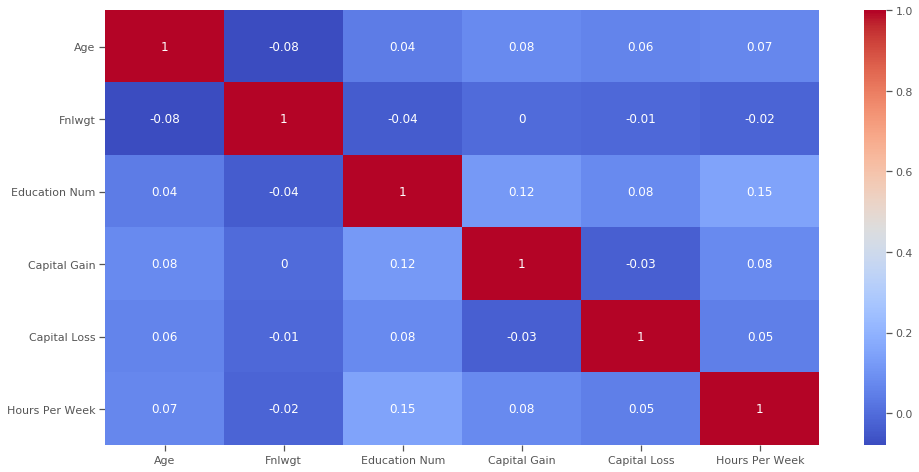

In [15]:
#will encode the features
plt.figure(figsize=(16, 8))
sns.heatmap(round(df.corr(), 2),cmap='coolwarm',annot=True)


Name columns and preprocess some of the data inside the DF

Preprocessing Key:

age: continuous.
<br>
workclass: Private : 0 , Self-emp-not-inc : 1 , Self-emp-inc : 2 , Federal-gov : 3, Local-gov : 4, State-gov : 5, Without-pay : 6, Never-worked : 7.
<br>
fnlwgt: continuous.
<br>
education: Bachelors : 0, Some-college : 1, 11th : 2, HS-grad : 3, Prof-school : 4, Assoc-acdm : 5, Assoc-voc : 6, 9th : 7, 7th-8th : 8, 12th : 9, Masters : 10, 1st-4th : 11, 10th : 12, Doctorate : 13, 5th-6th : 14, Preschool : 15.
<br>
education-num: continuous.
<br>
marital-status: Married-civ-spouse : 0, Divorced : 1, Never-married : 2, Separated : 3, Widowed : 4, Married-spouse-absent : 5, Married-AF-spouse : 6.
<br>
occupation: Tech-support : 0, Craft-repair : 1, Other-service : 2, Sales : 3, Exec-managerial : 4, Prof-specialty : 5, Handlers-cleaners : 6, Machine-op-inspct : 7, Adm-clerical : 8, Farming-fishing : 9, Transport-moving : 10, Priv-house-serv : 11, Protective-serv : 12, Armed-Forces : 13.
<br>
relationship: Wife : 0 , Own-child : 1 , Husband : 2, Not-in-family : 3, Other-relative : 4, Unmarried : 5.
<br>
race: White : 0, Asian-Pac-Islander : 1, Amer-Indian-Eskimo : 2, Other : 3, Black : 4.
<br>
sex: Female : 0, Male : 1.
<br>
capital-gain: continuous.
<br>
capital-loss: continuous.
<br>
hours-per-week: continuous.
<br>
native-country: United-States : 0, Cambodia : 1, England : 2, Puerto-Rico : 3, Canada : 4, Germany : 5, Outlying-US(Guam-USVI-etc) : 6, India : 7, Japan : 8, Greece : 9, South : 10, China : 11, Cuba : 12, Iran : 13, Honduras : 14, Philippines : 15, Italy : 16, Poland : 17, Jamaica : 18, Vietnam : 19, Mexico : 20, Portugal : 21, Ireland : 22, France : 23, Dominican-Republic : 24, Laos : 25, Ecuador : 26, Taiwan : 27, Haiti : 28, Columbia : 29, Hungary : 30, Guatemala : 31, Nicaragua : 32, Scotland : 33, Thailand : 34, Yugoslavia : 35, El-Salvador : 36, Trinadad&Tobago : 37, Peru : 38, Hong : 39, Holand-Netherlands : 40.
<br>

In [16]:
colnames = [
    "Age",
    "Workclass",
    "Fnlwgt",
    "Education",
    "Education Num",
    "Marital Status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Capital Gain",
    "Capital Loss",
    "Hours Per Week",
    "Native Country",
    "Income"
]

dataframe.columns = colnames

workclass_repl = {
    " Private" : 0, 
    " Self-emp-not-inc" : 1, 
    " Self-emp-inc" : 2,
    " Federal-gov" : 3, 
    " Local-gov" : 4,
    " State-gov" : 5,
    " Without-pay" : 6,
    " Never-worked" : 7,
    " ?" : np.nan
}

dataframe["Workclass"] = [workclass_repl[item] for item in dataframe["Workclass"]]

education_repl = { " Bachelors" : 0, " Some-college" : 1, " 11th" : 2, " HS-grad" : 3, " Prof-school" : 4, " Assoc-acdm" : 5, " Assoc-voc" : 6, " 9th" : 7, " 7th-8th" : 8, " 12th" : 9, " Masters" : 10, " 1st-4th" : 11, " 10th" : 12, " Doctorate" : 13, " 5th-6th" : 14, " Preschool" : 15 }
dataframe["Education"] = [education_repl[item] for item in dataframe["Education"]]

marital_repl = {" Married-civ-spouse" : 0, " Divorced" : 1, " Never-married" : 2, " Separated" : 3, " Widowed" : 4, " Married-spouse-absent" : 5, " Married-AF-spouse" : 6 }
dataframe["Marital Status"] = [marital_repl[item] for item in dataframe["Marital Status"]]

occupation_repl = { " ?" : np.nan, " Tech-support" : 0, " Craft-repair" : 1, " Other-service" : 2, " Sales" : 3, " Exec-managerial" : 4, " Prof-specialty" : 5, " Handlers-cleaners" : 6, " Machine-op-inspct" : 7, " Adm-clerical" : 8, " Farming-fishing" : 9, " Transport-moving" : 10, " Priv-house-serv" : 11, " Protective-serv" : 12, " Armed-Forces" : 13 }
dataframe["Occupation"] = [occupation_repl[item] for item in dataframe["Occupation"]]

relationship_repl = { " ?" : np.nan, " Wife" : 0 , " Own-child" : 1 , " Husband" : 2, " Not-in-family" : 3, " Other-relative" : 4, " Unmarried" : 5 }
dataframe["Relationship"] = [relationship_repl[item] for item in dataframe["Relationship"]]

race_repl = { " ?" : np.nan, " White" : 0, " Asian-Pac-Islander" : 1, " Amer-Indian-Eskimo" : 2, " Other" : 3, " Black" : 4 }
dataframe["Race"] = [race_repl[item] for item in dataframe["Race"]]

sex_repl = { " ?" : np.nan, " Female" : 0, " Male" : 1 }
dataframe["Sex"] = [sex_repl[item] for item in dataframe["Sex"]]

country_repl = { " ?" : np.nan, " United-States" : 0, " Cambodia" : 1, " England" : 2, " Puerto-Rico" : 3, " Canada" : 4, " Germany" : 5, " Outlying-US(Guam-USVI-etc)" : 6, " India" : 7, " Japan" : 8, " Greece" : 9, " South" : 10, " China" : 11, " Cuba" : 12, " Iran" : 13, " Honduras" : 14, " Philippines" : 15, " Italy" : 16, " Poland" : 17, " Jamaica" : 18, " Vietnam" : 19, " Mexico" : 20, " Portugal" : 21, " Ireland" : 22, " France" : 23, " Dominican-Republic" : 24, " Laos" : 25, " Ecuador" : 26, " Taiwan" : 27, " Haiti" : 28, " Columbia" : 29, " Hungary" : 30, " Guatemala" : 31, " Nicaragua" : 32, " Scotland" : 33, " Thailand" : 34, " Yugoslavia" : 35, " El-Salvador" : 36, " Trinadad&Tobago" : 37, " Peru" : 38, " Hong" : 39, " Holand-Netherlands" : 40 }
dataframe["Native Country"] = [country_repl[item] for item in dataframe["Native Country"]]

income_repl = { " ?" : np.nan, " <=50K" : 0, " >50K" : 1 }
dataframe["Income"] = [income_repl[item] for item in dataframe["Income"]]

#First drop NA values
dataframe = dataframe.dropna()
dataframe

#From preprocessing analysis, drop a few columns we don't use in our analysis
#dataframe = dataframe.drop(columns=['Fnlwgt', 'Capital Gain', 'Capital Loss'])

,Age,Workclass,Fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,1.0,83311,0,13,0,4.0,2,0,1,0,0,13,0.0,0
1,38,0.0,215646,3,9,1,6.0,3,0,1,0,0,40,0.0,0
2,53,0.0,234721,2,7,0,6.0,2,4,1,0,0,40,0.0,0
3,28,0.0,338409,0,13,0,5.0,0,4,0,0,0,40,12.0,0
4,37,0.0,284582,10,14,0,4.0,0,0,0,0,0,40,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.0,257302,5,12,0,0.0,0,0,0,0,0,38,0.0,0
32556,40,0.0,154374,3,9,0,7.0,2,0,1,0,0,40,0.0,1
32557,58,0.0,151910,3,9,4,8.0,5,0,0,0,0,40,0.0,0
32558,22,0.0,201490,3,9,2,8.0,1,0,1,0,0,20,0.0,0


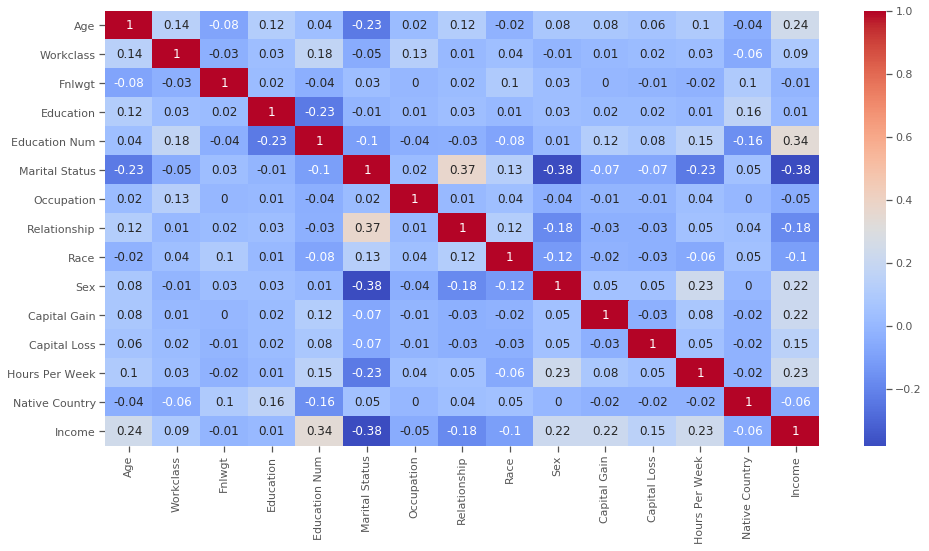

In [17]:
plt.figure(figsize=(16, 8))
sns.heatmap(round(dataframe.corr(), 2),cmap='coolwarm',annot=True)

Generate Test/Train split

In [42]:
size = dataframe.values.shape[1] - 1

#attributes not including prediction label
X = dataframe.values[:, :size]
#prediction label
Y = dataframe.values[:, size:]

x_train = X[:20000, :] #~70/30 split
x_test  = X[20000:, :]
y_train = Y[:20000, :]
y_test  = Y[20000:, :]

y_train = y_train.ravel()
y_test  = y_test.ravel()

x_test

array([[    41,      0,  98061, ...,      0,     40,      0],
       [    34,      1, 260560, ...,      0,     50,      0],
       [    23,      0, 289909, ...,      0,     45,      0],
       ...,
       [    58,      0, 151910, ...,      0,     40,      0],
       [    22,      0, 201490, ...,      0,     20,      0],
       [    52,      2, 287927, ...,      0,     40,      0]], dtype=int32)

1. A method to select rows in the dataset where a feature we specify equals a value we pass to the function.
2. A method to compute error given a set of predicted labels and a set of true labels

In [29]:
def split_on_val_eq(X_test, Y_test, column, val):
    ## TYPE ANSWER HERE 
    X0_test = []
    X1_test = []
    Y0_test = []
    Y1_test = []
    
    for ind in range(0, X_test.shape[0]):
        if X_test[ind][column] == val:
            X0_test.append(X_test[ind])
            Y0_test.append(Y_test[ind])
        else:
            X1_test.append(X_test[ind])
            Y1_test.append(Y_test[ind])
    
    return (X0_test, X1_test, Y0_test, Y1_test)

def error(y, y_hat):
    count = 0
    total_instances = len(y)
    
    def check(elem):
        nonlocal count
        cond = elem != y_hat[count]
        count += 1
        return cond
    
    total_error = len(list(filter(check, y)))
    
    return total_error / total_instances

## INPUTS:
# y - true labels
# y_hat - predicted labels
def accuracy(y, y_hat):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 1:
            tp += 1
        elif y[x] == 0 and y_hat[x] == 1:
            fp += 1
        elif y[x] == 0 and y_hat[x] == 0:
            tn += 1
        elif y[x] == 1 and y_hat[x] == 0:
            fn += 1
    
    return (tp + tn) / (tp + tn + fp + fn)

def true_positives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 1:
            result += 1
            
    return result

def false_positives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 0 and y_hat[x] == 1:
            result += 1
            
    return result

def false_negatives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 1 and y_hat[x] == 0:
            result += 1
    return result

def true_negatives(y, y_hat):
    result = 0
    for x in range(0, len(y)):
        if y[x] == 0 and y_hat[x] == 0:
            result += 1
            
    return result

# Some rate methods
def true_positive_rate(y, y_hat):
    tp = true_positives(y, y_hat)
    fn = false_negatives(y, y_hat)
    
    return tp / (tp + fn) if tp != 0 else 0

def false_positive_rate(y, y_hat):
    tn = true_negatives(y, y_hat)
    fp = false_positives(y, y_hat)
    
    return fp / (fp + tn) if fp != 0 else 0

def false_negative_rate(y, y_hat):
    tp = true_positives(y, y_hat)
    fn = false_negatives(y, y_hat)
    
    return fn / (tp + fn) if fn != 0 else 0


Import sklearn and initialize decision tree/logreg solvers

In [20]:
from sklearn import linear_model, tree
%matplotlib inline
import matplotlib.pyplot as plt

dt = tree.DecisionTreeClassifier(max_depth=5)
logreg = linear_model.LogisticRegression(solver='liblinear')

Check error for different sample sizes on logreg and dt models. Decision tree appears to give the most accurate results (at a depth of 5).

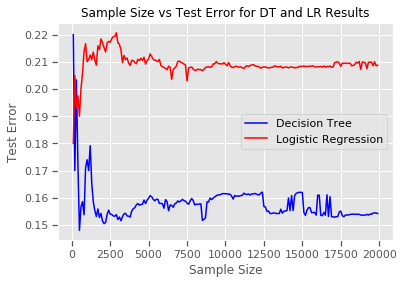

In [21]:
plot_data_dt = {"sample_size": [], "test_error": []}
plot_data_lg = {"sample_size": [], "test_error": []}

for n in range(100, 20000, 100):
    n_rows_x = x_train[:n, :]
    n_rows_y = y_train[:n]
    
    model_dt = dt.fit(n_rows_x, n_rows_y)
    model_lg = logreg.fit(n_rows_x, n_rows_y)

    pred_dt  = model_dt.predict(x_test)
    pred_logreg  = model_lg.predict(x_test)
    
    plot_data_dt["sample_size"].append(n)
    plot_data_dt["test_error"].append(error(y_test[:n], pred_dt))
    
    plot_data_lg["sample_size"].append(n)
    plot_data_lg["test_error"].append(error(y_test[:n], pred_logreg))
    
plt.title('Sample Size vs Test Error for DT and LR Results')
plt.xlabel('Sample Size')
plt.ylabel('Test Error')
    
plt.plot(plot_data_dt["sample_size"], plot_data_dt["test_error"], color='blue', label='Decision Tree')
plt.plot(plot_data_lg["sample_size"], plot_data_lg["test_error"], color='red', label='Logistic Regression')
plt.legend()

plt.show()

Show number of false negatives vs sample size

In [40]:
model = dt.fit(x_train, y_train)

(femaleX, _, femaleY, _) = split_on_val_eq(x_test, y_test, 9, 0)
(maleX, _, maleY, _) = split_on_val_eq(x_test, y_test, 9, 1)

pred_male = model.predict(maleX)
pred_female = model.predict(femaleX)

err_male = accuracy(maleY, pred_male)
err_female = accuracy(femaleY, pred_female)

print("Total female: " + str(len(femaleX)))
print("Total male: " + str(len(maleX)))

print("Accuracy when sex = male: " + str(err_male))
print("Accuracy when sex = female: " + str(err_female))
print("# of False Negatives when sex = female: " + str(false_negatives(femaleY, pred_female)))
print("# of False Negatives when sex = male: " + str(false_negatives(maleY, pred_male)))

Total female: 3291
Total male: 6870
Accuracy when sex = male: 0.8119359534206696
Accuracy when sex = female: 0.9164387724096019
# of False Negatives when sex = female: 229
# of False Negatives when sex = male: 1027


Now show details with decision tree model

In [39]:
model = dt.fit(x_train, y_train)

(femaleX, _, femaleY, _) = split_on_val_eq(x_test, y_test, 9, 0)
(maleX, _, maleY, _) = split_on_val_eq(x_test, y_test, 9, 1)

pred_female = model.predict(femaleX)
pred_male = model.predict(maleX)

acc_male = accuracy(maleY, pred_male)
acc_female = accuracy(femaleY, pred_female)

print("Total female: " + str(len(femaleX)))
print("Total male: " + str(len(maleX)))

print("Accuracy when sex = male: " + str(acc_male))
print("Accuracy when sex = female: " + str(acc_female))
print("false negative rate when sex = female: " + str(false_negative_rate(femaleY, pred_female)))
print("false negative rate when sex = male: " + str(false_negative_rate(maleY, pred_male)))

Total female: 3291
Total male: 6870
Accuracy when sex = male: 0.8119359534206696
Accuracy when sex = female: 0.9164387724096019
false negative rate when sex = female: 0.6090425531914894
false negative rate when sex = male: 0.46766848816029144


Above shows there is ~7% increase in accuracy for male individuals and ~2% increase in accuracy for females. Also, using a decision tree model, we've reduced the number of false negatives for both sexes.

Let's keep splitting on different subgroups and see which one has the worst false negative rate

In [41]:

dataframe = dataframe.astype('int32')
max_fn = -1
max_fn_col  = None
max_fn_val  = None

#print(x_test.shape)

for i in range(0, len(dataframe.columns) - 1):
    if i == 2 or i == 10 or i == 11: #skip over fnlwgt, capital gain/loss
        continue
    
    for x in range(dataframe[dataframe.columns[i]].min(), dataframe[dataframe.columns[i]].max() + 1):
        (X, _, Y, _) = split_on_val_eq(x_test, y_test, i, x)
        
        if X == []:
            continue
        
        pred = model.predict(X)
        fn = false_negative_rate(Y, pred)
        if fn > 0.6:
            print(dataframe.columns[i], "value: " + str(x), "false negative rate: " + str(fn), "total instances: " + str(len(X)), sep=', ')
        if fn > max_fn:
            max_fn = fn
            max_fn_col = i
            max_fn_val = x


Age, value: 23, false negative rate: 0.7142857142857143, total instances: 262
Age, value: 24, false negative rate: 0.7142857142857143, total instances: 246
Age, value: 25, false negative rate: 0.8125, total instances: 263
Age, value: 26, false negative rate: 0.9130434782608695, total instances: 247
Age, value: 27, false negative rate: 0.7083333333333334, total instances: 257
Age, value: 28, false negative rate: 0.7391304347826086, total instances: 286
Age, value: 29, false negative rate: 0.72, total instances: 267
Age, value: 30, false negative rate: 0.7833333333333333, total instances: 269
Age, value: 31, false negative rate: 0.7727272727272727, total instances: 288
Age, value: 32, false negative rate: 0.7878787878787878, total instances: 266
Age, value: 33, false negative rate: 0.7037037037037037, total instances: 264
Age, value: 75, false negative rate: 1.0, total instances: 12
Age, value: 78, false negative rate: 1.0, total instances: 4
Age, value: 81, false negative rate: 1.0, tot

From the results above, I believe we can disregard Income (obviously) and Native Country because from the chart shown above, the amount of instances where the individual's native country is the United States outweighs any other value for that category.